In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
claims = pd.read_csv('claims.csv')
cust_demo = pd.read_csv('cust_demographics.csv')

# 1. Import both files and combines the two datasets appropriately

In [3]:
df = pd.merge(left= claims,
             right=cust_demo,
             left_on='customer_id',
             right_on='CUST_ID',
             how= 'inner')

In [4]:
df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


# 2. Perform Data Audit


In [5]:
df.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [6]:
 df = df.drop(columns=['CUST_ID'])

In [7]:
df['claim_date'] = pd.to_datetime(df['claim_date'])

In [8]:
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'])

In [9]:
def audit(x):
    n = x.count()
    nmiss = x.isnull().sum()
    percmiss = (nmiss/n) * 100
    return pd.DataFrame([x.count(), x.isnull().sum() , percmiss,x.mean() , x.median() , x.std() , x.var() , x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()],
                     index=['N', 'NMISS', 'PERCMISS' ,'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [10]:
df_audit =  audit(df).T

pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_audit

,N,NMISS,PERCMISS,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
claim_id,1085.000,0.000,0.000,48915528.401,48559754.000,29128181.618,848450964360648.625,26832.000,1327778.840,3929507.400,7907545.800,24046062.000,48559754.000,74043997.000,89445574.800,94660566.400,98890653.440,99775483.000
customer_id,1085.000,0.000,0.000,50767904.342,49759488.000,28496245.372,812036000322492.625,154557.000,1160488.280,6108729.200,11265394.000,26450621.000,49759488.000,76093960.000,89510506.200,94641249.400,98237918.200,99961993.000
incident_cause,1085,0,0.000,NaN,NaN,NaN,NaN,Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other driver error
claim_date,1085,0,0.000,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-30 00:00:00
claim_area,1085,0,0.000,NaN,NaN,NaN,NaN,Auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
police_report,1085,0,0.000,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
claim_type,1085,0,0.000,NaN,NaN,NaN,NaN,Injury only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Material only
claim_amount,1020.000,65.000,6.373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_policy_claims,1075.000,10.000,0.930,1.587,1.000,1.147,1.315,1.000,1.000,1.000,1.000,1.000,1.000,2.000,3.000,4.000,6.000,8.000
fraudulent,1085,0,0.000,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


# 3. Convert the datatype of column claim_amount to numeric. Remove dollar sign


In [11]:
df['claim_amount'] = df['claim_amount'].apply(lambda x : float(str(x).replace('$','')))
df.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

# 4. Of all the injury claims, some of them have gone unreported with the police, create a flag (0,1) for all such claims.

In [12]:
df['alert_flags'] = np.where(df['police_report'] == 'Unknown', 1,0)

In [13]:
df


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flags
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000,1.000,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000,3.000,No,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500,1.000,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000,6.000,No,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000,1.000,No,Female,1986-05-01,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.000,1.000,No,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.000,1.000,No,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.000,2.000,No,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.000,4.000,No,Female,2064-10-22,LA,469-345-5617,Silver,0


# 5. Retain most recent and eliminate duplicate values from Customer ID

In [14]:
df.drop_duplicates(subset= 'customer_id', keep= 'last')

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flags
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000,1.000,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000,3.000,No,Female,1970-01-13,ME,265-543-1264,Silver,1
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000,6.000,No,Female,1984-03-11,TN,798-631-4758,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.000,1.000,No,Female,1986-05-01,MA,413-187-7945,Silver,1
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.000,2.000,No,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.000,1.000,No,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.000,1.000,No,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.000,2.000,No,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.000,4.000,No,Female,2064-10-22,LA,469-345-5617,Silver,0


# 6. Check for missing values and impute appropriately

In [15]:
audit(df).T

,N,NMISS,PERCMISS,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
claim_id,1085.000,0.000,0.000,48915528.401,48559754.000,29128181.618,848450964360648.625,26832.000,1327778.840,3929507.400,7907545.800,24046062.000,48559754.000,74043997.000,89445574.800,94660566.400,98890653.440,99775483.000
customer_id,1085.000,0.000,0.000,50767904.342,49759488.000,28496245.372,812036000322492.625,154557.000,1160488.280,6108729.200,11265394.000,26450621.000,49759488.000,76093960.000,89510506.200,94641249.400,98237918.200,99961993.000
incident_cause,1085,0,0.000,NaN,NaN,NaN,NaN,Crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other driver error
claim_date,1085,0,0.000,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-30 00:00:00
claim_area,1085,0,0.000,NaN,NaN,NaN,NaN,Auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home
police_report,1085,0,0.000,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
claim_type,1085,0,0.000,NaN,NaN,NaN,NaN,Injury only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Material only
claim_amount,1020.000,65.000,6.373,12467.681,2740.000,13783.250,189977971.258,1000.000,1040.000,1180.000,1350.000,1870.000,2740.000,24260.000,34309.000,37803.475,44633.225,48150.500
total_policy_claims,1075.000,10.000,0.930,1.587,1.000,1.147,1.315,1.000,1.000,1.000,1.000,1.000,1.000,2.000,3.000,4.000,6.000,8.000
fraudulent,1085,0,0.000,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [16]:
df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].mean())

In [17]:
df['total_policy_claims'] = df['total_policy_claims'].replace(np.NaN,df['total_policy_claims'].mode())

# 7. Calculate Age and based on criteria categorize it

In [19]:
curryear = pd.to_datetime('today').year
df['BirthYear'] = pd.DatetimeIndex(df['DateOfBirth']).year
df['Age'] = curryear - df['BirthYear']
df.loc[(df.Age < 18), 'AgeCategory'] = 'Children'
df.loc[(df.Age >= 18) & (df.Age < 30), 'AgeCategory'] = 'Youth'
df.loc[(df.Age >= 30) & (df.Age < 60), 'AgeCategory'] = 'Adult'
df.loc[(df.Age > 60), 'AgeCategory'] = 'Senior'
df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flags,BirthYear,Age,AgeCategory
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000,1.000,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,1979,41,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000,3.000,No,Female,1970-01-13,ME,265-543-1264,Silver,1,1970,50,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.500,1.000,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,36,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000,6.000,No,Female,1984-03-11,TN,798-631-4758,Silver,0,1984,36,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.000,1.000,No,Female,1986-05-01,MA,413-187-7945,Silver,0,1986,34,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.000,1.000,No,Female,1981-03-15,ND,459-425-4319,Platinum,0,1981,39,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.000,1.000,No,Female,1996-07-07,ID,529-462-1635,Silver,0,1996,24,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.000,2.000,No,Male,1990-04-11,WI,712-651-9613,Gold,0,1990,30,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.000,4.000,No,Female,2064-10-22,LA,469-345-5617,Silver,0,2064,-44,Children


# 8. What are the various amounts claimed by customer for various segments


In [20]:
df.groupby('Segment').claim_amount.mean()

Segment
Gold       12829.632
Platinum   12341.952
Silver     12208.436
Name: claim_amount, dtype: float64

# 9. Total claimed amount based on incident cause for all the claims that have been done atleast 20 days prior to 1st October, 2018


In [21]:

x = pd.to_datetime('2017-10-1')
priorDate = x - timedelta(20)
df1 =  df[(df['claim_date'] < '2017-10-1') & (df['claim_date'] >= priorDate)]
df1['claim_amount'].sum()

242008.72549019606

# 10. How many adult from TX, DE and AK claimed insurance for driver related issue ?


In [22]:
df2 = df.loc[((df.State == 'TX') | (df.State == 'DE') | (df.State =='AK')) & (df.AgeCategory == 'Adult') & (df.incident_cause == 'Driver error')]
df2['customer_id'].count()

14

# 11. Draw a pir chart on aggregated value of amount claimed based on gender and segments.


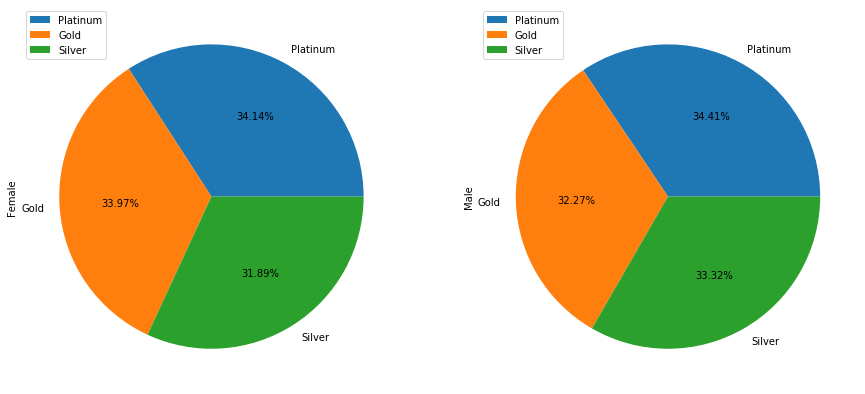

In [23]:
aggClaim = pd.pivot_table(data= df ,index= 'Segment', columns='gender', values= 'claim_amount')
aggClaim.plot(kind = 'pie',
              autopct = '%.2f%%', 
              figsize = (15,15),
              labels = ['Platinum', 'Gold','Silver'],
              subplots = True)
plt.show()

# 12. Amoung male and female, which gender has claimed most for any type of driver related issue?

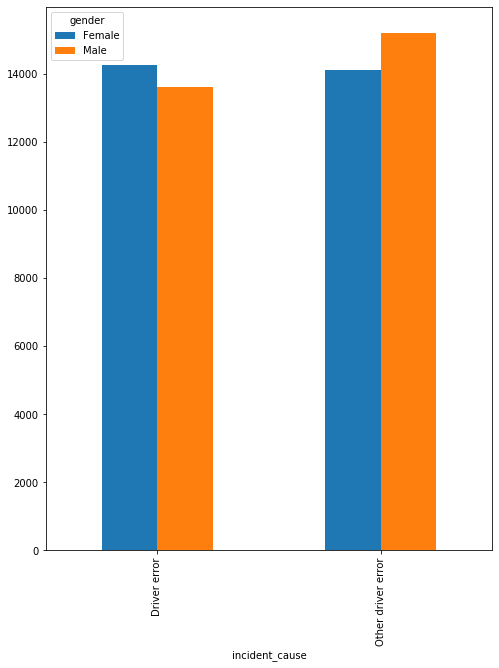

In [24]:
mostClaims = df.loc[(df.incident_cause =='Driver error') | (df.incident_cause == 'Other driver error')]
MC1 = pd.pivot_table(mostClaims, index = 'incident_cause', columns='gender', values='claim_amount' )
MC1.plot(kind = 'bar',
        figsize = (8,10))
plt.show()

# 13.  Which age group had maximum fraudulent claims?

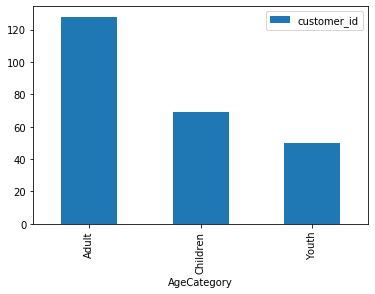

In [25]:
fraud = df.loc[df['fraudulent'] == 'Yes']
fraudGroup  = pd.DataFrame(fraud.groupby('AgeCategory').customer_id.count())
fraudGroup.plot(kind= 'bar')
plt.show()

# 14. Visualize the monthly trend of the total amount claimed by the customer.

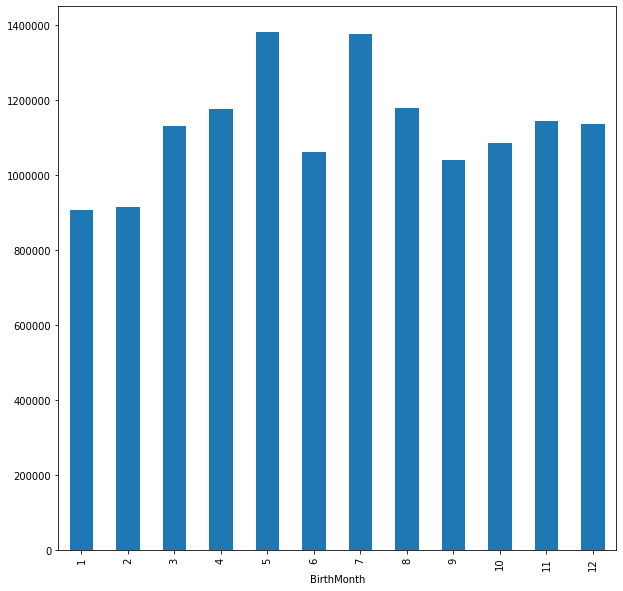

In [26]:
df['BirthMonth'] = pd.DatetimeIndex(df['DateOfBirth']).month
df3 = df.groupby('BirthMonth').claim_amount.sum()

df3.plot(kind = 'bar', figsize= (10,10))
plt.show()

# 15.

In [27]:
df5 = pd.DataFrame(df.groupby(['fraudulent','gender', 'AgeCategory']).claim_amount.mean())
df5 = df5.reset_index()
df5

,fraudulent,gender,AgeCategory,claim_amount
0,No,Female,Adult,12231.154
1,No,Female,Children,12160.568
2,No,Female,Youth,12851.635
3,No,Male,Adult,12342.447
4,No,Male,Children,11932.554
5,No,Male,Youth,12341.423
6,Yes,Female,Adult,14933.241
7,Yes,Female,Children,6335.031
8,Yes,Female,Youth,8277.884
9,Yes,Male,Adult,15852.342


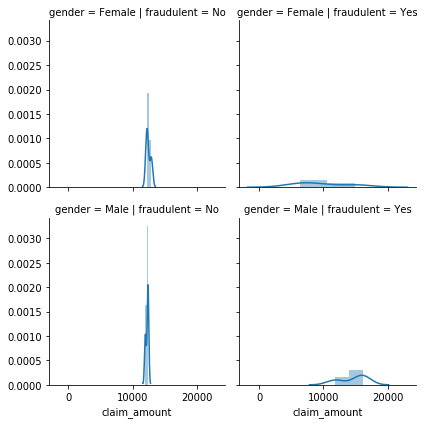

In [28]:
## I am not able to add AgeCategory to the following graph
g= sns.FacetGrid(df5, col ='fraudulent', row = 'gender' )
g = g.map(sns.distplot, 'claim_amount')

# 16 .

In [29]:
dfMAmount = df.claim_amount.loc[df.gender == "Male"]
dfFAmount = df.claim_amount.loc[df.gender == "Female"]

### Since we have to test the influence of binary categorical variable on a continous variable , we will use Independent Sample T Test
                      


### State Null and Alt Hypothesis

H0: Amount claimed by males == Amount claimed by females <br>
H1: Amount claimed by males <> Amount claimed by females

In [31]:
import scipy.stats as stats

eq_Variance = stats.ttest_ind(a = dfMAmount,
                       b = dfMAmount,
                       equal_var= True)
eq_Variance

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [32]:
uneq_Variance = stats.ttest_ind(a = dfMAmount,
                       b = dfMAmount,
                       equal_var= False)
uneq_Variance

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [33]:
stats.f_oneway(dfMAmount, dfFAmount)

F_onewayResult(statistic=0.9483133979100016, pvalue=0.33036643165098045)

### According to the Anova, p value is higher than 0.05. Therefore we fail to reject the null hypothesis. That means that the amount claimed by males and females are equal

# 17.

### Since both the variables are categorical, and we need to check the influence of one cat. variable on another cat. var, we will use Chi Square Test


First, we create a crosstab

In [34]:
ageCat_segment = pd.crosstab(df.AgeCategory, df.Segment, margins=True)
ageCat_segment

Segment,Gold,Platinum,Silver,All
AgeCategory,,,,
Adult,202,180,171,553
Children,92,94,92,278
Youth,81,88,85,254
All,375,362,348,1085


H0 = Observered == Expected
H1 = Observered != Expected

H0 would be no relation between AgeCategory and segments <br>
H1 would be yes, there is relation between Agecategory and segments

In [35]:
ageCat_seg_test = stats.chi2_contingency(observed=ageCat_segment)
ageCat_seg_test

(2.040374674979015,
 0.9908129071918075,
 9,
 array([[ 191.12903226,  184.50322581,  177.36774194,  553.        ],
        [  96.08294931,   92.75207373,   89.16497696,  278.        ],
        [  87.78801843,   84.74470046,   81.46728111,  254.        ],
        [ 375.        ,  362.        ,  348.        , 1085.        ]]))

In [36]:
print("the Chi-Square statistic is {} and p value is {}". format(ageCat_seg_test[0],ageCat_seg_test[1] ))

the Chi-Square statistic is 2.040374674979015 and p value is 0.9908129071918075


Since the p-value is clearly greater than 0.05, we fail to reject null hypothesis(H0). Therefore, there is no relation between AgeCategory and segments

# 18.

Last year mean = 10000  -- > from population data <br> 
This year mean = 12467.681  --> from sample data <br>
<br>
 H0 = Current year claim amounts == 10000 <br>
 H1 = Current year claim amount > 10000

In [37]:
df.claim_amount.mean()

12467.681372549034

In [38]:
ttest1 = stats.ttest_1samp(a= df.claim_amount, popmean=10000)
ttest1

Ttest_1sampResult(statistic=6.082468636028012, pvalue=1.6383633097209731e-09)

In [39]:
tscore = ttest1.statistic
pval = ttest1.pvalue
print('The T score is {} and the p-value is {}'. format(tscore, pval))

The T score is 6.082468636028012 and the p-value is 1.6383633097209731e-09


### Since p-value is less than 0.05, we reject H0 that is  we reject null hypothesis. Therefore we go with H1 and conclude that  current year claim amount is more than last year's.

<br>

# 19.

In [40]:
agecat1 = df.total_policy_claims.loc[df.AgeCategory == 'Children']
agecat2 = df.total_policy_claims.loc[df.AgeCategory == 'Youth']
agecat3 = df.total_policy_claims.loc[df.AgeCategory == 'Adult']


In [41]:
test_age = stats.f_oneway(agecat1,  agecat2,  agecat3)
test_age

F_onewayResult(statistic=nan, pvalue=nan)

# 20.

In [43]:
df.total_policy_claims.corr(other = df.claim_amount)

-0.017543087395457437

### We can say that the correlation between total_police_claims and claim_amount is almost negligible and is inversely proportional